# IPython & Jupyter: a PyCon 2017 tutorial

In [1]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


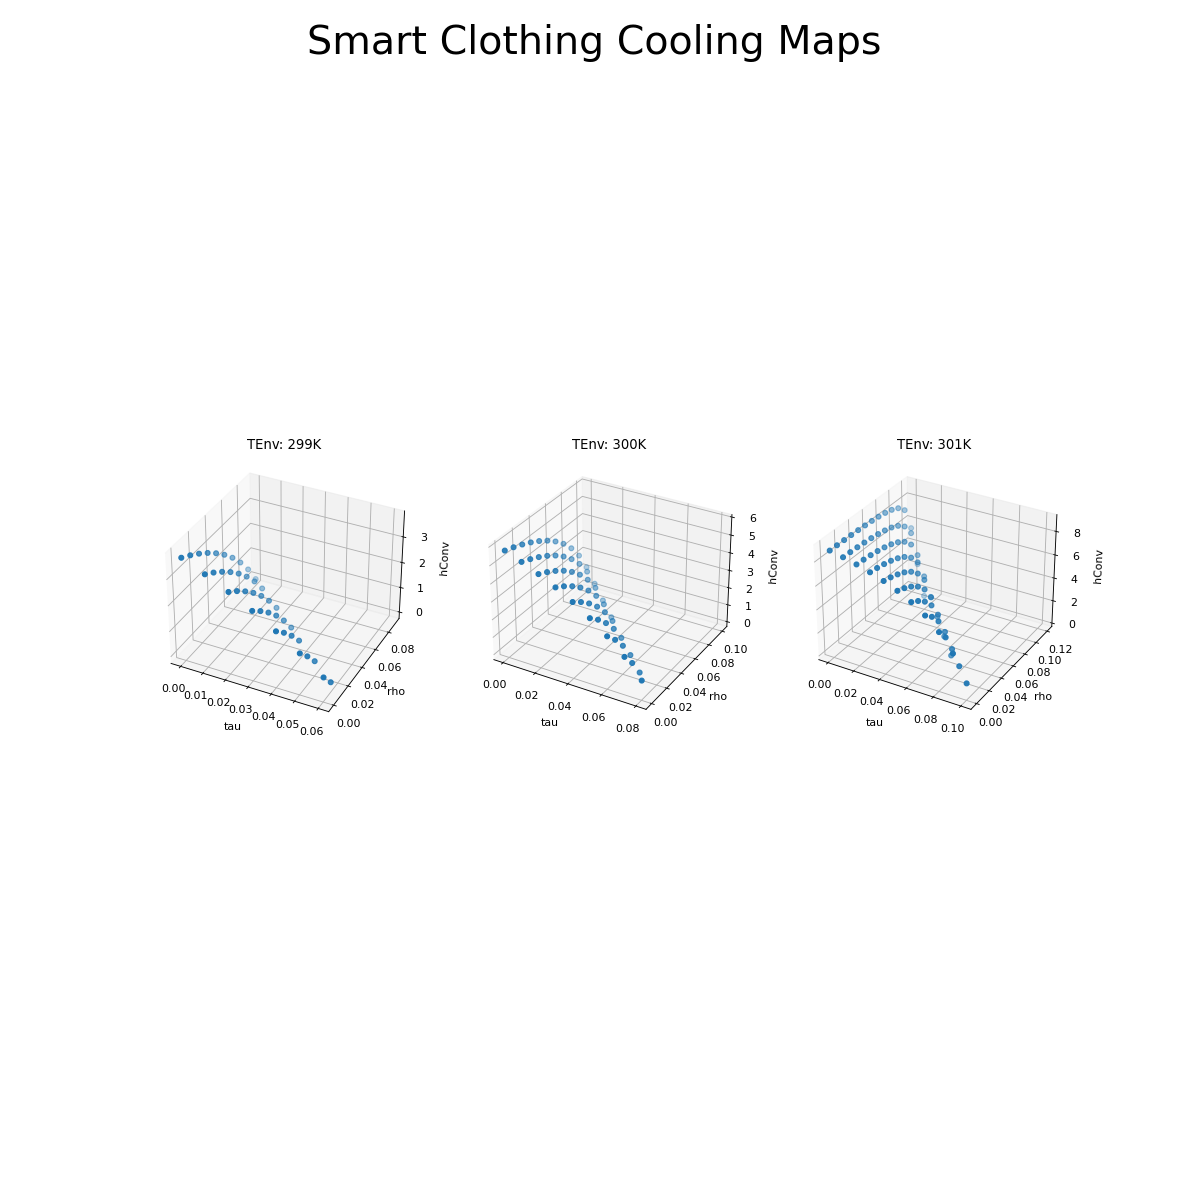

In [3]:
import numpy as np
import fqs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
import scipy.interpolate

import matplotlib


# # quartic solver

#
# p = np.array([[1, 4, 6, 4, 1]])
# roots = fqs.quartic_roots(p)
# print(roots[0][0].real)
# print(type(roots[0][0].real))

# Task
# T_summer vs tauClo
# T_winter vs rhoClo
# when Tenv change, can tauClo or rhoClo also change
# from 0 to 1 to meet the physical mechanisms?

# constants
# degree C
TBody = 34 + 273
# TEnv = 22+273
#
TEnvLow = 25 + 273
TEnvHigh = 28 + 273
# watts/K/m2
Metab = 58

# sigma unit W*(m^-2)*(K^-4)
sigma = 5.67*10**(-8)
epsilonSkin = 1
epsilonEnv = 1
FskToCl = 1
FclToSk = 1

# # the following has not been implemented
# AreaBody = 2
# AreaEnv = 10
# FEnvToCl = 0.28
# FclToEnv = 0.72

# enclosed Air
# W*(m^-2)*(K^-1)
kAir = 0.024
kClo = 0.047
# m
thickAir = 2*10**(-3)
thickClo = 0.5*10**(-3)

qRS = sigma * TBody ** 4
# qRE = sigma * TEnv ** 4

X,Y,Z = [],[],[]
Epsilon = []

for TEnv in range(TEnvLow,TEnvHigh):
    tauCloList = []
    rhoCloList = []
    hConvCEList = []
    epsilonCloList = []
    qRE = sigma * TEnv ** 4

    for tauClo in np.linspace(0, 1, 101):
        # tauClo = 0.03
        for rhoClo in np.linspace(0, 1, 101):
            # rhoClo = 0.001
            if (tauClo + rhoClo) > 1:
                continue
            epsilonClo = 1 - tauClo - rhoClo
            if(epsilonClo<0 or epsilonClo > 1):
                continue
            A = -sigma*epsilonClo
            B = 0
            C = 0
            D = -1*kAir/thickAir
            E = kAir/thickAir*(TBody)-tauClo*qRE + (epsilonClo - rhoClo) * qRS - Metab
            p = np.array([[A, B, C, D, E]])
            try:
                TCloOneRoots = fqs.quartic_roots(p)
            except ZeroDivisionError:
                continue
            if (TCloOneRoots[0][1].real > 0 and TCloOneRoots[0][1].real > TEnv):
                TCloOne = TCloOneRoots[0][1].real
            else:
                continue
            # TCloTwo = TCloOne - Metab/kClo*thickClo
            TCloTwo = TCloOne
            # print("TCloOne:"+str(TCloOne)+", TCloTwo:"+ str(TCloTwo)+", TEnv:"+ str(TEnv))
            qRCloTwo = epsilonClo *sigma*TCloTwo**4
            qConvCE = Metab - tauClo*qRS+(epsilonClo-rhoClo)*qRE - qRCloTwo
            hConvCE = qConvCE/(TCloTwo - TEnv)
            if(hConvCE <= 0 or hConvCE >50 ):
                continue
            tauCloList.append(tauClo)
            rhoCloList.append(rhoClo)
            hConvCEList.append(hConvCE)
            epsilonCloList.append(epsilonClo)

    xtau = np.array(tauCloList)
    yrho = np.array(rhoCloList)
    zhconv = np.array(hConvCEList)
    epcl = np.array(epsilonCloList)
    X.append(xtau)
    Y.append(yrho)
    Z.append(zhconv)
    Epsilon.append(epcl)
plots = zip(X,Y,Z)
# for idx,itm in enumerate(X):
#     print(len(itm))
# print(X)
# print(Y)
# print(Epsilon)
# print(Z)


def loop_plot(plots,len):
    figs = plt.figure(figsize=(15, 15))
    xyLabel = True
    for idx, plot in enumerate(plots):
        ax=figs.add_subplot(1,len,idx+1, projection='3d')
        try:
            # ax.plot_trisurf(plot[0],plot[1],plot[2])
            ax.scatter(plot[0], plot[1], plot[2],marker="o")
        except RuntimeError:
            continue
        ax.set_title("TEnv: "+str(TEnvLow+1+idx)+"K")
        if(xyLabel):
            ax.set_xlabel('tau')
            ax.set_ylabel('rho')
            ax.set_zlabel('hConv')
            # xyLabel =False
    return figs
figs = loop_plot(plots,len(X))
# fig.suptitle('This is a somewhat long figure title', fontsize=16)

figs.suptitle("Smart Clothing Cooling Maps",fontsize=36)
# figs.savefig("TEnv from "+str(TEnvLow) +"K to "+str(TEnvHigh)+"K.png")
plt.show()

Class outline:

* A quick installation check of [ipython](https://ipython.org/install.html) and [jupyter notebook](https://jupyter.readthedocs.io/en/latest/install.html)
* An overview of the IPython project from [the official website](http://ipython.org), and [jupyter](https://jupyter.org)
* Super basic intro to the notebook: typing code.
* [Notebook Basics](examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Customizing IPython - a condensed version](exercises/Customization/Condensed.ipynb)
* [Running a Secure Public Notebook Server](examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter/IPython works](examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

Get this tutorial:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.continuum.io/downloads):

    conda install ipython jupyter

with pip:

    # first, upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

There are a lot more detailed notebooks in this same directory that cover other topics, but we can not cover all in a 3-hour tutorial. We encourage you to explore them and practice on your own.